#### Set Up

In [1]:
## imports and dependencies 

# standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# accuracy measures
from sklearn.metrics import mean_absolute_error

#### Data

In [2]:
# data 
df = pd.read_csv('data/dataset_updated.csv', encoding='latin1')

In [3]:
# reduced dataset 
df = df[["Weekly Gross", "Club", "Pos"]]
df.head()

,Weekly Gross,Club,Pos
0,26929,Empoli,CB
1,11987,Atalanta,DF
2,23973,Atalanta,DF
3,24137,Atalanta,CB
4,23865,Atalanta,CB


In [4]:
# NaNs
df.isna().sum().sum()

0

#### Models 

In [5]:
# baseline model 1
df1 = df.copy() 
avg = df1['Weekly Gross'].mean()
df1['Predicted Weekly Gross'] = avg
mae1 = mean_absolute_error(df1['Weekly Gross'], df1['Predicted Weekly Gross'])
mae1

30520.457487416206

In [7]:
# baseline model 2
df2 = df.copy()

club_wages_dict = {}
club_count_dict = {}
club_avg_dict = {}

for index, row in df2.iterrows():
    if row["Club"] in club_wages_dict:
        club_wages_dict[row["Club"]] += row["Weekly Gross"]
        club_count_dict[row["Club"]] += 1
    else:
        club_wages_dict[row["Club"]] = row["Weekly Gross"]
        club_count_dict[row["Club"]] = 1

for key, value in club_wages_dict.items():
    club_avg_dict[key] = value/club_count_dict[key]

sorted_club_avg_dict = dict(sorted(club_avg_dict.items(), key=lambda item: item[1],reverse=True))

df2['Predicted Weekly Gross'] = 0

for i in range(len(df2)):
    df2.at[i,'Predicted Weekly Gross'] = sorted_club_avg_dict[df2["Club"].iloc[i]]   

mae2 = mean_absolute_error(df2['Weekly Gross'], df2['Predicted Weekly Gross'])
mae2

18562.23104927089

In [8]:
clubs = list(sorted_club_avg_dict.keys())
club_wages = list(sorted_club_avg_dict.values())

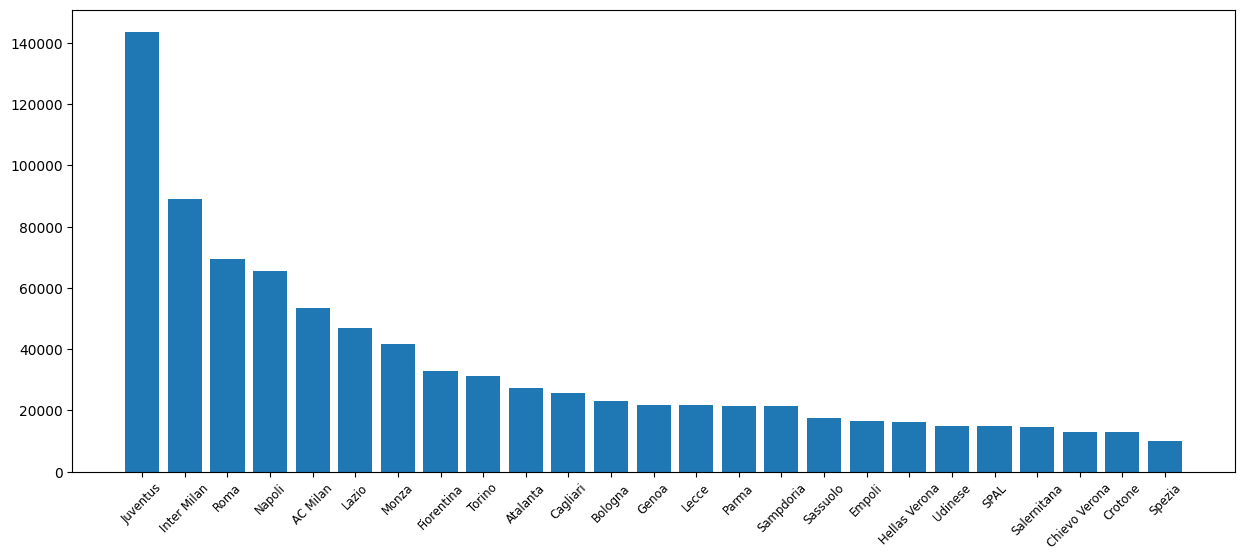

In [9]:
fig1, ax1 = plt.subplots(figsize=(15, 6))
ax1.bar(range(len(club_avg_dict)), club_wages, tick_label=clubs)
ax1.set_xticklabels(clubs, rotation=45, fontsize='small')
plt.show()

In [10]:
# baseline model 3
df3 = df.copy()

pos_wages_dict = {}
pos_count_dict = {}
pos_avg_dict = {}

for index, row in df3.iterrows():
    if row["Pos"] in pos_wages_dict:
        pos_wages_dict[row["Pos"]] += row["Weekly Gross"]
        pos_count_dict[row["Pos"]] += 1
    else:
        pos_wages_dict[row["Pos"]] = row["Weekly Gross"]
        pos_count_dict[row["Pos"]] = 1

for key, value in pos_wages_dict.items():
    pos_avg_dict[key] = value/pos_count_dict[key]

sorted_pos_avg_dict = dict(sorted(pos_avg_dict.items(), key=lambda item: item[1],reverse=True))

df3['Predicted Weekly Gross'] = 0

for i in range(len(df3)):
    df3.at[i,'Predicted Weekly Gross'] = pos_avg_dict[df3["Pos"].iloc[i]]   

mae3 = mean_absolute_error(df3['Weekly Gross'], df3['Predicted Weekly Gross'])
mae3

30035.016920546444

In [11]:
pos = ['Forward','Second Striker','Centre Forward','Right Wing','Forward/Defender','Forward/Midfielder','Attacking Mid','Centre Mid','Midfield','Left Mid','Defensive Mid','Centre Back','Defender','Left WIng','Right Mid','Right Back','Left Back','Midfield/Defender']
pos_wages = list(sorted_pos_avg_dict.values())

In [12]:
y1_min, y1_max = ax1.get_ylim()
max_club_avg = list(sorted_club_avg_dict.values())[0]
min_club_avg = list(sorted_club_avg_dict.values())[-1]

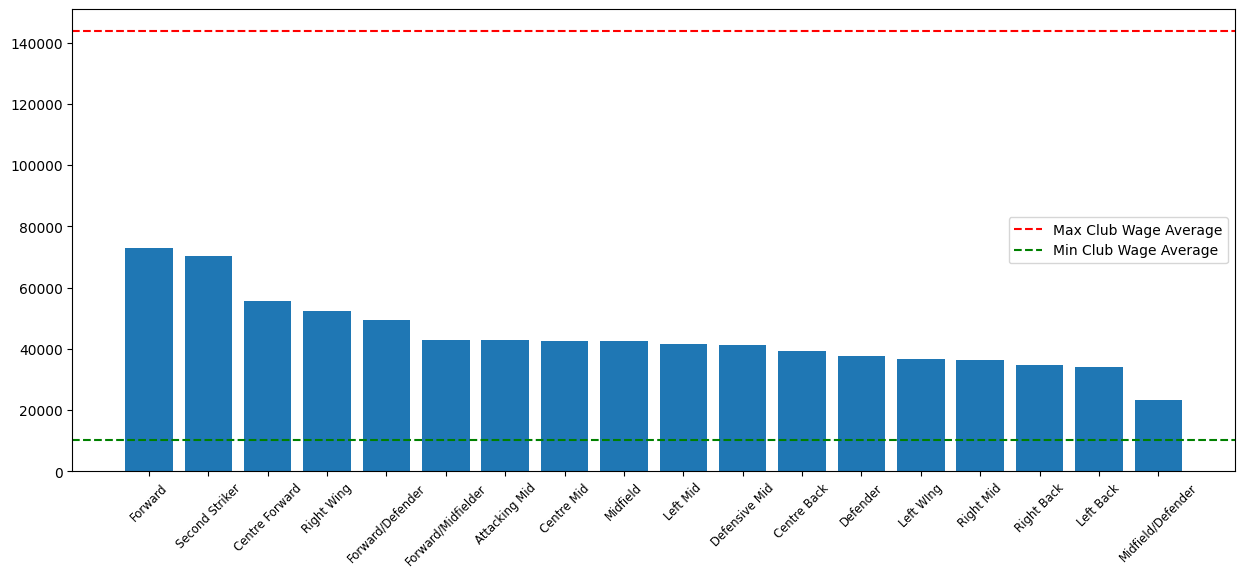

In [13]:
fig2, ax2 = plt.subplots(figsize=(15, 6))
ax2.set_ylim(y1_min, y1_max)
ax2.bar(range(len(pos_wages)), pos_wages, tick_label=pos)
ax2.set_xticklabels(pos, rotation=45, fontsize='small')
max_line = plt.axhline(y=max_club_avg, color='r', ls='--',label='Max Club Wage Average')
min_line = plt.axhline(y=min_club_avg, color='g',ls='--',label='Min Club Wage Average')
ax2.legend()
plt.savefig('average_wages.png',pad_inches=3)
plt.show()

In [14]:
# baseline model 4
df4 = df.copy()

club_pos_wages_dict = {}
club_pos_count_dict = {}
club_pos_avg_dict = {}

for index, row in df4.iterrows():
    if str(row["Club"] + row["Pos"]) in club_pos_wages_dict:
        club_pos_wages_dict[str(row["Club"] + row["Pos"])] += row["Weekly Gross"]
        club_pos_count_dict[str(row["Club"] + row["Pos"])] += 1
    else:
        club_pos_wages_dict[str(row["Club"] + row["Pos"])] = row["Weekly Gross"]
        club_pos_count_dict[str(row["Club"] + row["Pos"])] = 1

for key, value in club_pos_wages_dict.items():
    club_pos_avg_dict[key] = value/club_pos_count_dict[key]

sorted_club_pos_avg_dict = dict(sorted(club_pos_avg_dict.items(), key=lambda item: item[1],reverse=True))

df4['Predicted Weekly Gross'] = 0

for i in range(len(df4)):
    df4.at[i,'Predicted Weekly Gross'] = club_pos_avg_dict[str(df4["Club"].iloc[i] + df4["Pos"].iloc[i])]   

mae4 = mean_absolute_error(df4['Weekly Gross'], df4['Predicted Weekly Gross'])
mae4

15752.535896020992

In [15]:
count = 0

for key, value in dict(sorted(club_pos_count_dict.items(), key=lambda item: item[1])).items():
    if value == 1:
        count += 1

count

57

#### Conclusion

In [16]:
MAE = [mae1, mae2, mae3, mae4]
models = ["Average", "Club Average", "Position Average", "Club/Position Average"]
y_pos = np.arange(len(models))

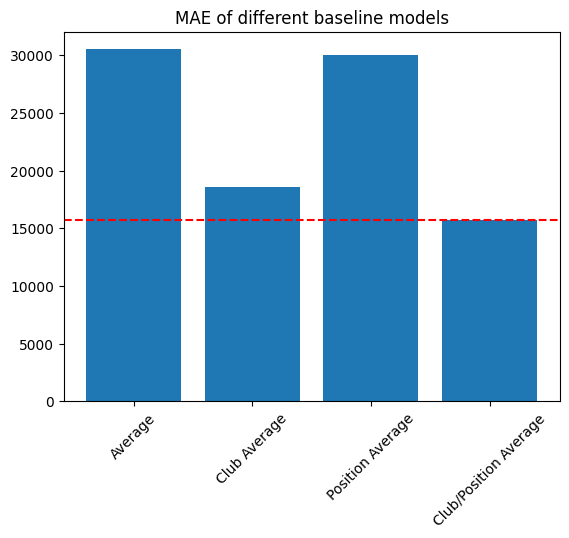

In [17]:
plt.bar(y_pos, MAE)
plt.title("MAE of different baseline models")
plt.xticks(y_pos, models, rotation = 45)
plt.axhline(y = mae4, color = 'r', ls = '--')